In [22]:
import numpy as np
import pandas as pd

In [165]:
#Extracting the data
a=pd.read_csv("C:/Users/hp/Desktop/insurance data/insurance_data.csv")
a.head()


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [166]:
#finding where it is null values or not
a.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [167]:
#for visuallization,representing the data by using stats
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3669: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


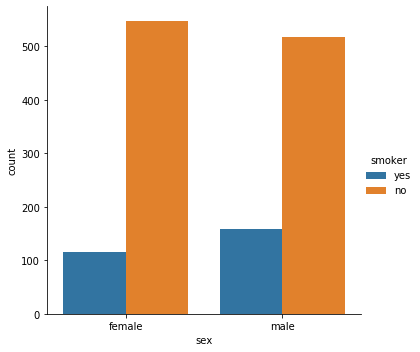

In [168]:
sns.factorplot(x='sex',data=a,kind='count',hue='smoker')

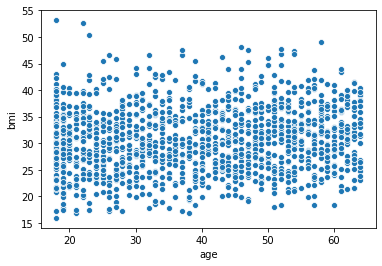

In [172]:
sns.scatterplot(x='age',y='bmi',data=a)

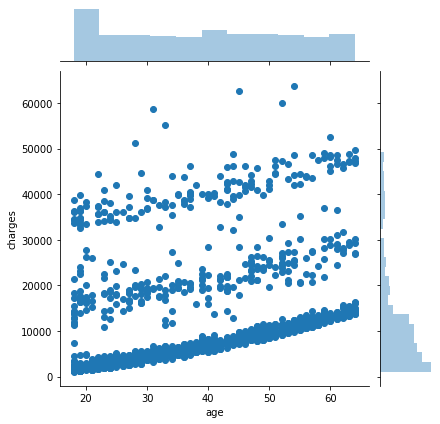

In [97]:
sns.jointplot(x="age",y="charges",data=a,kind="scatter")

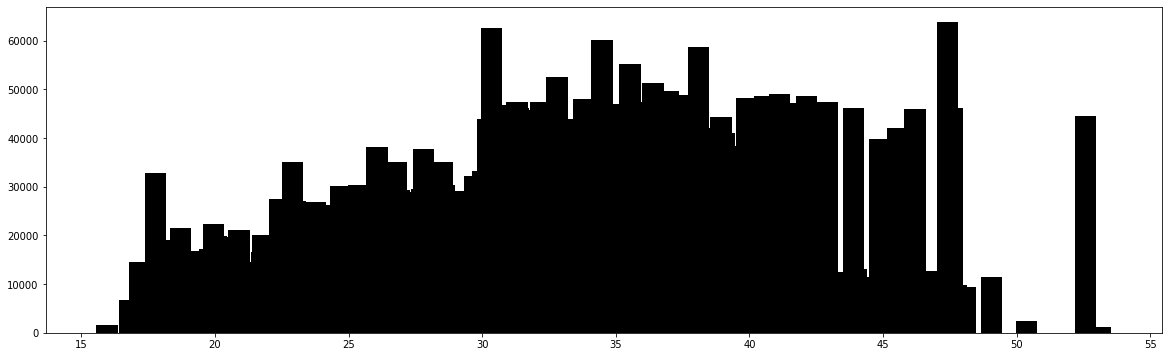

In [57]:
plt.figure(figsize=(20,6))
plt.bar(a.bmi,a.charges,color="black")
plt.show()

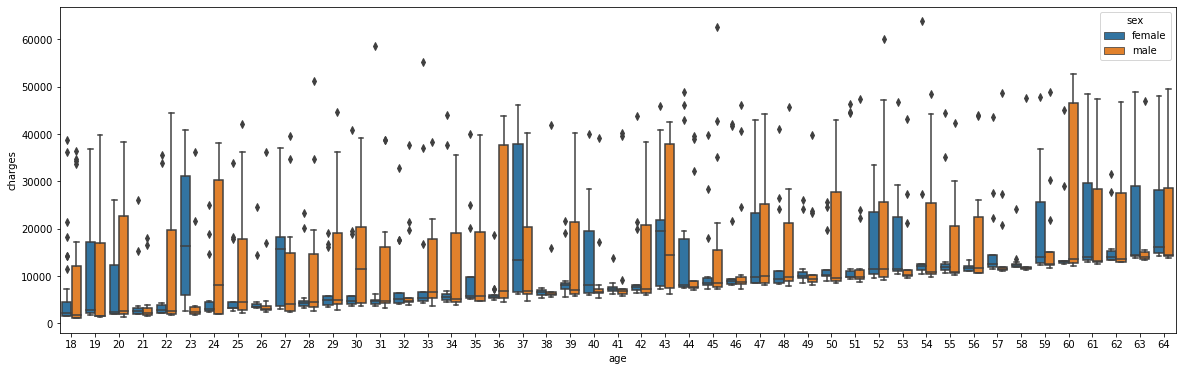

In [58]:
plt.figure(figsize=(20,6))
sns.boxplot(x="age",y="charges",hue="sex",data=a)

#here we see outliers in dataset so,we solve this problem by using outliers

In [59]:
#ouliers

outliers=[]
def detect_outliers(data):
    threshold=3
    mean=np.mean(data)
    std=np.std(data)
    
    for x in data:
        z_score=(x-mean)/std
        if np.abs(z_score)>threshold:
            outliers.append(x)
       
    return outliers



In [60]:
x=detect_outliers(a["charges"])
x

[51194.55914,
 63770.42801,
 58571.074479999996,
 55135.402089999996,
 52590.82939,
 60021.39897,
 62592.87309]

In [61]:
#finding the co-relation between the dataset
a.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


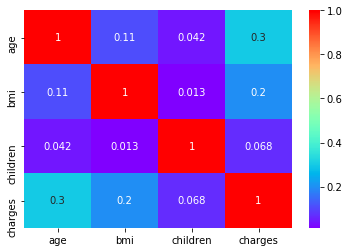

In [62]:

sns.heatmap(a.corr(),cmap="rainbow",annot=True)

In [176]:
#now before doing modelling part fist we convert our dataset into the integer variable
#by using dummies or label encoder

from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
a["sex"]=le.fit_transform(a["sex"])

a["region"]=le.fit_transform(a["region"])

a["smoker"]=le.fit_transform(a["smoker"])
a.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,1,30.97,3,0,1,10600.5483
1334,18,0,31.92,0,0,0,2205.9808
1335,18,0,36.85,0,0,2,1629.8335
1336,21,0,25.80,0,0,3,2007.9450
1337,61,0,29.07,0,1,1,29141.3603


In [177]:
#modeling part
x=a.iloc[:,[0,1,2,3,4,5]]
y=a.iloc[:,[6]]

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 100)

In [178]:
#for pre processing
from sklearn.preprocessing import StandardScaler
mn=StandardScaler()
x_train=mn.fit_transform(x_train)
x_test=mn.fit_transform(x_test)

In [179]:
#linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [180]:
pred=lr.predict(x_test)
pred

array([[ 3644.93951003],
       [ 3617.88612878],
       [ 7815.5156805 ],
       [ 2240.97539578],
       [22445.27071267],
       [35351.91900215],
       [14811.95829541],
       [ 2300.47980026],
       [26928.62482255],
       [15894.05913223],
       [15187.71903431],
       [ 4281.40970435],
       [11044.90222136],
       [ 4060.80011688],
       [ 8629.95579472],
       [29335.81469709],
       [11299.25847281],
       [12031.7934823 ],
       [ 6042.47043376],
       [18196.91586687],
       [13876.60391224],
       [ 2031.94446877],
       [ 6053.25458176],
       [29597.60943999],
       [13531.21234448],
       [30581.8554775 ],
       [ 6446.05836723],
       [38080.21829997],
       [29509.95400944],
       [13017.12241438],
       [18052.76506617],
       [ 2116.16056633],
       [37667.05436769],
       [24582.46987553],
       [ 7636.22848709],
       [11426.44595867],
       [ 7789.41614825],
       [30936.59074135],
       [ 3730.8583075 ],
       [36118.48552241],


In [182]:
from sklearn.metrics import r2_score
r2_score(y_test,pred)*100

78.06589273820394